# *This graduation project was developed and completed by:*
# *Khalid Alammari*
# *Turki Lughbi*
# *Mohammed Hantool*
# *Hulayyil Faqiri*

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("heart_2020_balanced(1).csv")
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,25.02,No,No,No,0.0,7.0,No,Female,50-54,White,No,Yes,Good,6.0,Yes,No,Yes
1,No,23.30,No,No,No,0.0,0.0,No,Female,50-54,Black,No,Yes,Good,7.0,No,No,No
2,No,25.77,Yes,No,No,0.0,0.0,No,Male,45-49,White,No,Yes,Very good,4.0,Yes,No,No
3,No,25.61,Yes,Yes,Yes,2.0,30.0,No,Female,25-29,White,Yes,No,Fair,6.0,No,No,No
4,No,31.16,Yes,No,No,0.0,0.0,Yes,Female,65-69,Black,No,Yes,Fair,7.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319789,Yes,17.98,Yes,No,No,0.0,0.0,No,Female,35-39,White,No,Yes,Very good,7.0,No,No,No
319790,Yes,31.00,Yes,No,No,0.0,1.0,No,Female,70-74,White,No,Yes,Good,6.0,No,No,No
319791,Yes,24.39,Yes,No,Yes,15.0,0.0,Yes,Female,80 or older,White,Yes,No,Poor,10.0,No,No,No
319792,Yes,28.25,Yes,No,Yes,0.0,0.0,No,Male,75-79,White,Yes,No,Fair,4.0,No,No,No


In [ ]:
df.shape

(319794, 18)

In [ ]:
df.dtypes

,0
HeartDisease,object
BMI,float64
Smoking,object
AlcoholDrinking,object
Stroke,object
PhysicalHealth,float64
MentalHealth,float64
DiffWalking,object
Sex,object
AgeCategory,object


In [ ]:
print(df.isnull().sum())

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


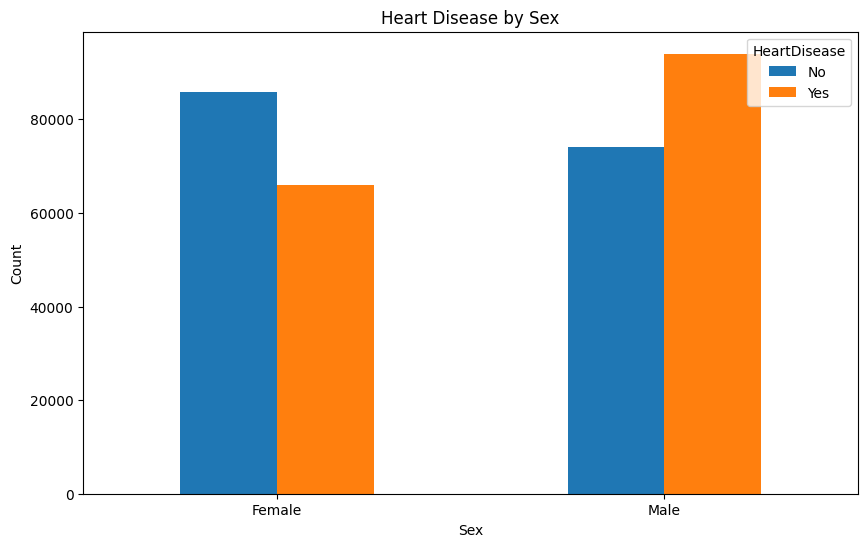

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
heart_disease_by_sex = df.groupby(['Sex', 'HeartDisease']).size().unstack(fill_value=0)

# Plotting the histogram
heart_disease_by_sex.plot(kind='bar', figsize=(10, 6))
plt.title('Heart Disease by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='HeartDisease', loc='upper right')
plt.show()

In [ ]:
df.drop(columns=['AlcoholDrinking', 'PhysicalHealth', 'Race','MentalHealth'], inplace=True)

df['HeartDisease'] = df['HeartDisease'].map({'Yes': 1, 'No': 0})

In [ ]:
# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Split features and target
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))

Random Forest Accuracy: 0.9235916759173846


In [ ]:
# XGBoost
xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))

XGBoost Accuracy: 0.7802967526071389


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

# Make predictions
lr_preds = lr.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))


Logistic Regression Accuracy: 0.7640988758423365


In [ ]:
# ANN
ann = Sequential()
ann.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
ann.add(Dense(32, activation='relu'))
ann.add(Dense(1, activation='sigmoid'))

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann.fit(X_train_scaled, y_train, epochs=5, batch_size=32, verbose=1)

# Evaluate ANN
ann_loss, ann_accuracy = ann.evaluate(X_test_scaled, y_test, verbose=0)
print("ANN Accuracy:", ann_accuracy)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
7995/7995 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7592 - loss: 0.5008
Epoch 2/5
7995/7995 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.7668 - loss: 0.4887
Epoch 3/5
7995/7995 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.7672 - loss: 0.4869
Epoch 4/5
7995/7995 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7701 - loss: 0.4834
Epoch 5/5
7995/7995 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7696 - loss: 0.4823
ANN Accuracy: 0.7703059911727905
